In [ ]:
pip install kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ardisusanto","key":"204d8545c9b9e78ad14863a56b11ad2a"}'}

In [4]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle datasets download -d rounakbanik/the-movies-dataset

 99% 225M/228M [00:02<00:00, 93.6MB/s]
100% 228M/228M [00:02<00:00, 105MB/s] 


In [10]:
!unzip the-movies-dataset.zip

Archive:  the-movies-dataset.zip
  inflating: credits.csv             
  inflating: keywords.csv            
  inflating: links.csv               
  inflating: links_small.csv         
  inflating: movies_metadata.csv     
  inflating: ratings.csv             
  inflating: ratings_small.csv       


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.cluster import KMeans

In [35]:
df = pd.read_csv('movies_metadata.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [36]:
df.head(1)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0


In [37]:
df = df[['budget','revenue','runtime','vote_average','vote_count','title']]

In [38]:
df.head(1)

,budget,revenue,runtime,vote_average,vote_count,title
0,30000000,373554033.0,81.0,7.7,5415.0,Toy Story


**Mengecek kolom yang kosong**

In [39]:
df.isna().sum()

budget            0
revenue           6
runtime         263
vote_average      6
vote_count        6
title             6
dtype: int64

**Semua yang NA dihapus**

In [40]:
df.dropna(inplace=True)

In [41]:
df.isna().sum()

budget          0
revenue         0
runtime         0
vote_average    0
vote_count      0
title           0
dtype: int64

In [42]:
df['vote_count'].describe()

count    45203.000000
mean       110.506515
std        492.638190
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64

In [43]:
df2 = df[df['vote_count'] > 30]

In [44]:
len(df), len(df2)

(45203, 12178)

In [45]:
df2.head()

,budget,revenue,runtime,vote_average,vote_count,title
0,30000000,373554033.0,81.0,7.7,5415.0,Toy Story
1,65000000,262797249.0,104.0,6.9,2413.0,Jumanji
2,0,0.0,101.0,6.5,92.0,Grumpier Old Men
3,16000000,81452156.0,127.0,6.1,34.0,Waiting to Exhale
4,0,76578911.0,106.0,5.7,173.0,Father of the Bride Part II


**Tahap Selanjutnya adalah melakukkan Scaling data**


Diskalakan dengan metode MinMax(0,1)

In [46]:
from sklearn import preprocessing

In [52]:
minmax=preprocessing.MinMaxScaler().fit_transform(df2.drop('title',axis=1))

In [53]:
minmax

array([[7.89473684e-02, 1.33988060e-01, 9.23603193e-02, 8.10526316e-01,
        3.83366562e-01],
       [1.71052632e-01, 9.42613127e-02, 1.18586089e-01, 7.26315789e-01,
        1.69609798e-01],
       [0.00000000e+00, 0.00000000e+00, 1.15165336e-01, 6.84210526e-01,
        4.34349188e-03],
       ...,
       [0.00000000e+00, 0.00000000e+00, 9.46408210e-02, 6.52631579e-01,
        4.27228710e-04],
       [0.00000000e+00, 0.00000000e+00, 4.56100342e-03, 8.73684211e-01,
        8.18855027e-03],
       [0.00000000e+00, 0.00000000e+00, 1.15165336e-01, 5.47368421e-01,
        8.11734549e-03]])

**nilai minmax kita kembalikan ke kolom df**

In [55]:
df3 = pd.DataFrame(minmax, index=df2.index, columns=df2.columns[:-1])

In [56]:
df3

,budget,revenue,runtime,vote_average,vote_count
0,0.078947,0.133988,0.092360,0.810526,0.383367
1,0.171053,0.094261,0.118586,0.726316,0.169610
2,0.000000,0.000000,0.115165,0.684211,0.004343
3,0.042105,0.029216,0.144812,0.642105,0.000214
4,0.000000,0.027468,0.120867,0.600000,0.010111
...,...,...,...,...,...
45353,0.000000,0.000000,0.104903,0.621053,0.000142
45373,0.000000,0.000000,0.094641,0.631579,0.000498
45380,0.000000,0.000000,0.094641,0.652632,0.000427
45437,0.000000,0.000000,0.004561,0.873684,0.008189


In [58]:
src=[]
for i in range(1,20):
  score=KMeans(n_clusters=i).fit(df3).score(df3)
  print(score)
  src.append(score)


-281.0031098516682
-198.57799199589329
-127.33958398552366
-106.07304224497132
-88.29829993922846
-78.78462894804237
-70.67137323947067
-63.36273759325495
-59.480475581166786
-55.60885728529265
-52.19541001954576
-49.418424308874805
-47.211779807679676
-45.1717278439985
-43.18211331568982
-41.45237224726476
-39.82587504179035
-38.12480663246292
-37.142311388868734


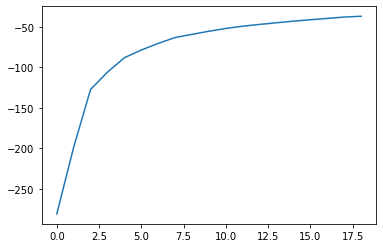

In [60]:
plt.plot(src)

**angka cluster terbaik berada di lengkungan yaitu 4 atau 5 cluster**

In [61]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [62]:
df3['cluster'] = kmeans.labels_

In [63]:
df3

,budget,revenue,runtime,vote_average,vote_count,cluster
0,0.078947,0.133988,0.092360,0.810526,0.383367,4
1,0.171053,0.094261,0.118586,0.726316,0.169610,3
2,0.000000,0.000000,0.115165,0.684211,0.004343,1
3,0.042105,0.029216,0.144812,0.642105,0.000214,1
4,0.000000,0.027468,0.120867,0.600000,0.010111,1
...,...,...,...,...,...,...
45353,0.000000,0.000000,0.104903,0.621053,0.000142,1
45373,0.000000,0.000000,0.094641,0.631579,0.000498,1
45380,0.000000,0.000000,0.094641,0.652632,0.000427,1
45437,0.000000,0.000000,0.004561,0.873684,0.008189,2


In [64]:
df3['title'] = df2['title']

In [65]:
df3

,budget,revenue,runtime,vote_average,vote_count,cluster,title
0,0.078947,0.133988,0.092360,0.810526,0.383367,4,Toy Story
1,0.171053,0.094261,0.118586,0.726316,0.169610,3,Jumanji
2,0.000000,0.000000,0.115165,0.684211,0.004343,1,Grumpier Old Men
3,0.042105,0.029216,0.144812,0.642105,0.000214,1,Waiting to Exhale
4,0.000000,0.027468,0.120867,0.600000,0.010111,1,Father of the Bride Part II
...,...,...,...,...,...,...,...
45353,0.000000,0.000000,0.104903,0.621053,0.000142,1,Frankenstein Created Woman
45373,0.000000,0.000000,0.094641,0.631579,0.000498,1,Take Me
45380,0.000000,0.000000,0.094641,0.652632,0.000427,1,The Incredible Jessica James
45437,0.000000,0.000000,0.004561,0.873684,0.008189,2,In a Heartbeat


(array([2273.,    0., 4805.,    0.,    0., 3748.,    0., 1099.,    0.,
         253.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

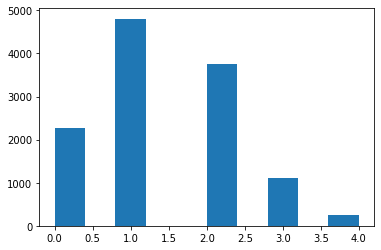

In [66]:
plt.hist(df3['cluster'])

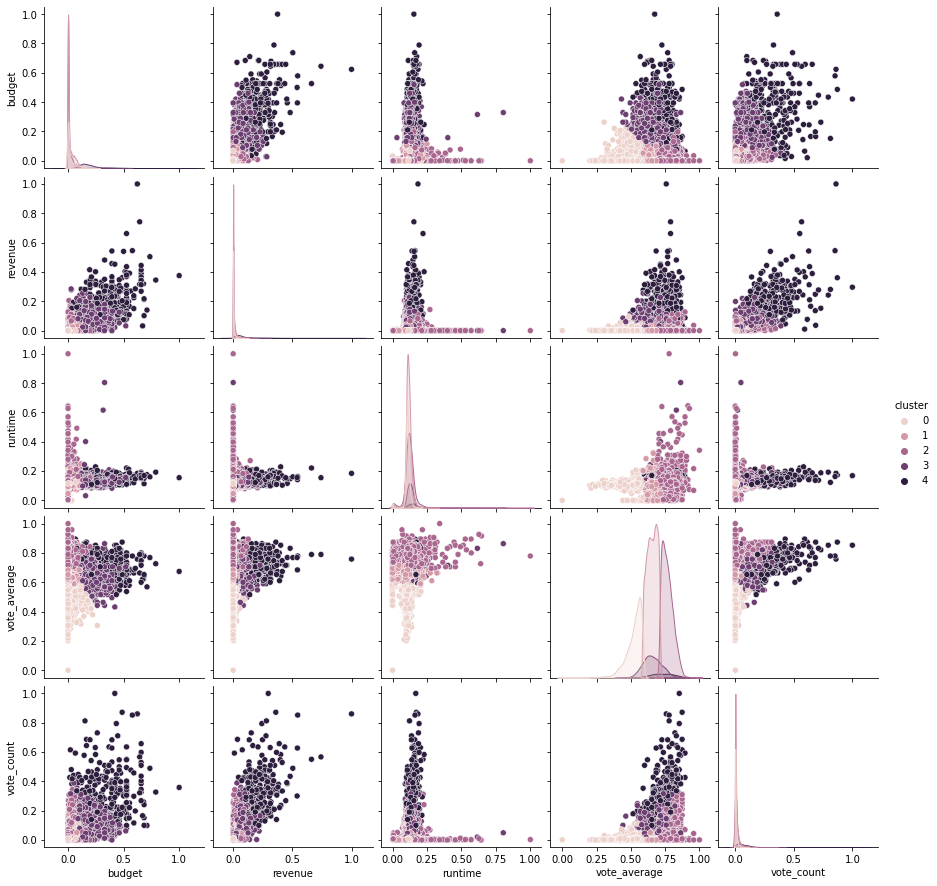

In [68]:
sns.pairplot(df3,hue='cluster')